# Introdução word2vec

**Base dados**

- http://www.nilc.icmc.usp.br/embeddings

In [148]:
import unicodedata
import sys
import string
import time
import csv
import nltk
import re

import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib as mpl

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

from platform import python_version
print('Versão Jupyter Notebook neste projeto:', python_version())

Author: Rafael Gallo

csv       : 1.0
sys       : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas    : 1.4.4
nltk      : 3.7
sklearn   : 0.0.post1
numpy     : 1.21.5
matplotlib: 3.5.2
re        : 2.2.1
seaborn   : 0.11.2

Versão Jupyter Notebook neste projeto: 3.9.13


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\55119\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\55119\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\55119\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Base dados

In [2]:
data1 = pd.read_csv("data/treino.csv")

In [3]:
data2 = pd.read_csv("data/teste.csv")

In [4]:
# Visualizando 10 primeiros dados
data1.head(10)

,title,text,date,category,subcategory,link
0,"Após polêmica, Marine Le Pen diz que abomina n...",A candidata da direita nacionalista à Presidên...,2017-04-28,mundo,NaN,http://www1.folha.uol.com.br/mundo/2017/04/187...
1,"Macron e Le Pen vão ao 2º turno na França, em ...",O centrista independente Emmanuel Macron e a d...,2017-04-23,mundo,NaN,http://www1.folha.uol.com.br/mundo/2017/04/187...
2,"Apesar de larga vitória nas legislativas, Macr...",As eleições legislativas deste domingo (19) na...,2017-06-19,mundo,NaN,http://www1.folha.uol.com.br/mundo/2017/06/189...
3,"Governo antecipa balanço, e Alckmin anuncia qu...",O número de ocorrências de homicídios dolosos ...,2015-07-24,cotidiano,NaN,http://www1.folha.uol.com.br/cotidiano/2015/07...
4,"Após queda em maio, a atividade econômica sobe...","A economia cresceu 0,25% no segundo trimestre,...",2017-08-17,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/08/1...
5,Barcelona vence de virada; Atlético de Madri b...,Depois de golear o Celtic por 7 a 0 em sua est...,2016-09-28,esporte,NaN,http://www1.folha.uol.com.br/esporte/2016/09/1...
6,'Spartacus' oferece um duplo retrato de batalh...,"""Spartacus"" (1960, TC Cult, 22h) narra a histó...",2016-09-12,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2016/12...
7,Sobe para 86 o número de mortos no atentado te...,"Um homem que ficou ferido no atentado de Nice,...",2016-08-19,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/08/180...
8,"Premiada em Sundance, Crystal Moselle retrata ...",Vencedora do prêmio do júri no Festival de Sun...,2016-11-09,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2016/09...
9,Metroviários e ferroviários ameaçam parar na p...,Funcionários do Metrô e da CPTM podem cruzar o...,2017-07-27,cotidiano,NaN,http://www1.folha.uol.com.br/cotidiano/2017/07...


In [5]:
# Visualizando 10 últimos dados
data1.tail()

,title,text,date,category,subcategory,link
89995,"Mural: Há 30 anos, aeroporto não foi bem receb...",Década de 1970. Congonhas já estava superlotad...,2015-01-22,cotidiano,NaN,http://www1.folha.uol.com.br/cotidiano/2015/01...
89996,"As notícias sobre Schumacher não são boas, diz...",O ex-presidente da Ferrari Luca di Montezemolo...,2016-04-02,esporte,NaN,http://www1.folha.uol.com.br/esporte/2016/02/1...
89997,"De olho em R$ 50 bilhões, governo pode concede...","Para fazer caixa, o governo estuda conceder pa...",2017-08-29,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/08/1...
89998,Moro deu a Lula o papel de coitadinho,Realizou-se parcialmente o primeiro objetivo d...,2016-06-03,colunas,eliogaspari,http://www1.folha.uol.com.br/colunas/eliogaspa...
89999,Velocidade da aprovação das reformas tem 'exce...,O Banco Central afirmou que a velocidade da ap...,2016-10-25,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/10/1...


In [6]:
# Linhas colunas
data1.shape

(90000, 6)

In [7]:
# Info dados
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        90000 non-null  object
 1   text         90000 non-null  object
 2   date         90000 non-null  object
 3   category     90000 non-null  object
 4   subcategory  17175 non-null  object
 5   link         90000 non-null  object
dtypes: object(6)
memory usage: 4.1+ MB


In [8]:
# Tipo dados
data1.dtypes

title          object
text           object
date           object
category       object
subcategory    object
link           object
dtype: object

In [13]:
# Amostra dados
data1.text.sample(25)

76236    Ao ficar pronto, em 1968, o Abaeté já era uma ...
51989    Era final de 1962, e Jefferson Marques de Souz...
74907    Em time campeão do mundo também se mexe, como ...
52268    Famosos usaram as redes sociais para lamentar ...
65883    A presidente Dilma Rousseff deve assinar o dec...
86504    O peronismo tenta se reorganizar na Argentina ...
56780    "Arrasaram. Agora, o 'rapa' não vem mais expul...
84193    A certa altura do filme "O Último Cine Drive-I...
69022    Foi com o intuito de fazer as contas que o eng...
46911    Nas Bahamas, atletismo é como o futebol para o...
22107    A Serasa Experian, dona do maior banco de dado...
5079     O governo israelense debaterá, nos próximos di...
80039    Assim que surgiram as primeiras notícias sobre...
57355    O mecanismo de alternância entre sono e vigíli...
69705    O primeiro-ministro israelense, Binyamin Netan...
31823    Recordista no cinema brasileiro neste século, ...
81812    Desde que chegou ao Corinthians, Cristóvão vem.

In [15]:
# Vitorização dados
from sklearn.feature_extraction.text import CountVectorizer

texto =[
        "tenha um bom dia",
        "tenha um péssimo dia",
        "tenha um ótimo dia",
        "tenha um dia ruim python java alura caelum papa"
    
]

# Criando uma instância
vet = CountVectorizer()

# Treinamento modelo
vet_fit = vet.fit(texto)

In [16]:
# Visualizando os vocabularios
vet.vocabulary_

{'tenha': 9,
 'um': 10,
 'bom': 1,
 'dia': 3,
 'péssimo': 7,
 'ótimo': 11,
 'ruim': 8,
 'python': 6,
 'java': 4,
 'alura': 0,
 'caelum': 2,
 'papa': 5}

In [17]:
# Transformando vetores para sentimento
vet_bom = vet.transform(["bom"])
print(vet_bom.toarray())

[[0 1 0 0 0 0 0 0 0 0 0 0]]


# Base dados - modelo nlp

In [18]:
with open("models/cbow_s300.txt") as x:
    for linha in range(10):
        print(next(x))

929606 300

</s> -0.001667 -0.000158 -0.000026 0.001300 -0.000796 0.001527 0.000046 0.000584 0.000449 -0.000100 0.000353 0.001251 0.001069 0.000506 0.000574 0.000838 -0.000930 -0.001220 0.000317 0.001315 -0.001120 0.001373 -0.000040 -0.001580 0.000421 -0.000667 -0.001556 -0.000746 0.001604 0.001157 -0.000027 0.000354 0.000358 -0.000527 -0.000573 -0.001512 -0.001557 -0.001637 0.001617 -0.001511 -0.001022 -0.001426 0.001086 -0.001033 0.000593 0.000724 0.000627 -0.000450 -0.001140 0.000333 0.000524 0.001541 0.000284 0.000617 -0.000807 -0.000088 -0.000364 0.001126 -0.001230 -0.001138 -0.001280 0.001330 0.001257 0.000576 0.000764 0.000684 0.001008 -0.000215 -0.000629 -0.001228 -0.001557 -0.000311 -0.000246 0.000045 0.001136 -0.000645 -0.000549 0.001099 0.000858 -0.000886 0.000553 0.000303 0.001433 0.000732 0.001321 -0.000894 -0.000700 -0.000661 -0.001484 -0.000950 -0.001556 -0.000809 0.000348 -0.000068 0.000724 -0.000569 -0.000161 -0.001628 -0.001437 -0.000259 -0.000296 -0.001571 0.000149 0

# Modelo Word2vec

In [20]:
%%time

# Importando modelo Word2Vec
from gensim.models import KeyedVectors

# Criando uma instância modelo
model = KeyedVectors.load_word2vec_format("models/cbow_s300.txt")

Wall time: 2min 56s


In [21]:
%%time

# Visualizando textos similar 1
model.most_similar("china")

Wall time: 657 ms


[('rússia', 0.7320705056190491),
 ('índia', 0.7241616249084473),
 ('tailândia', 0.701935887336731),
 ('indonésia', 0.6860769987106323),
 ('turquia', 0.6741335988044739),
 ('malásia', 0.6665689945220947),
 ('mongólia', 0.6593616008758545),
 ('manchúria', 0.6581847071647644),
 ('urss', 0.6581669449806213),
 ('grã-bretanha', 0.6568097472190857)]

In [22]:
%%time

# Visualizando textos similar 2
model.most_similar("itália")

Wall time: 73.2 ms


[('frança', 0.7983610033988953),
 ('grécia', 0.7547340989112854),
 ('espanha', 0.7417078018188477),
 ('holanda', 0.7343162298202515),
 ('grã-bretanha', 0.7281740307807922),
 ('inglaterra', 0.7172061204910278),
 ('bélgica', 0.7155542373657227),
 ('alemanha', 0.7135661840438843),
 ('suécia', 0.6831519603729248),
 ('áustria', 0.6822685599327087)]

In [23]:
%%time

# Visualizando textos similar 3
model.most_similar("china")

Wall time: 69.2 ms


[('rússia', 0.7320705056190491),
 ('índia', 0.7241616249084473),
 ('tailândia', 0.701935887336731),
 ('indonésia', 0.6860769987106323),
 ('turquia', 0.6741335988044739),
 ('malásia', 0.6665689945220947),
 ('mongólia', 0.6593616008758545),
 ('manchúria', 0.6581847071647644),
 ('urss', 0.6581669449806213),
 ('grã-bretanha', 0.6568097472190857)]

In [29]:
%%time

# Visualizando textos similar 4
model.most_similar("russia")

Wall time: 98.3 ms


[('marxism', 0.45398110151290894),
 ('enslavement', 0.42568230628967285),
 ('parasitology', 0.4099787473678589),
 ('countess', 0.4088614583015442),
 ('falling', 0.40257948637008667),
 ('comparison', 0.40074607729911804),
 ('yesterday', 0.3991527855396271),
 ('christianity', 0.3946215510368347),
 ('pseudoscience', 0.39050912857055664),
 ('metallothionein', 0.38845711946487427)]

In [30]:
%%time

# Visualizando textos similar 5
model.most_similar("alemanha")

Wall time: 73.2 ms


[('bélgica', 0.7396209239959717),
 ('ale-manha', 0.7230488061904907),
 ('itália', 0.7135661244392395),
 ('finlândia', 0.7134818434715271),
 ('frança', 0.6954975128173828),
 ('áustria', 0.6904558539390564),
 ('dinamarca', 0.6875618696212769),
 ('suécia', 0.6848707795143127),
 ('holanda', 0.6763719320297241),
 ('rússia', 0.6680961847305298)]

In [24]:
%%time

# Textos positivos
model.most_similar(positive=["brasil", "argentina"])

Wall time: 69.7 ms


[('chile', 0.6781662702560425),
 ('peru', 0.634803295135498),
 ('venezuela', 0.6273865103721619),
 ('equador', 0.6037014722824097),
 ('bolívia', 0.6017141342163086),
 ('haiti', 0.5993806719779968),
 ('méxico', 0.596230685710907),
 ('paraguai', 0.5957703590393066),
 ('uruguai', 0.5903671383857727),
 ('japão', 0.5893509984016418)]

In [25]:
%%time

#nuvens -> nuvem : estrelas -> estrela
#nuvens + estrela - nuvem = estrelas

model.most_similar(positive=["nuvens", "estrela"], 
                   negative=["nuvem"])

Wall time: 68.7 ms


[('estrelas', 0.5497430562973022),
 ('plêiades', 0.3791979253292084),
 ('colinas', 0.3746805489063263),
 ('trovoadas', 0.3737033009529114),
 ('sombras', 0.3734194040298462),
 ('pombas', 0.3726758360862732),
 ('corredoras', 0.3640727698802948),
 ('cigarras', 0.36065393686294556),
 ('galáxias', 0.35754913091659546),
 ('luas', 0.3575345277786255)]

In [26]:
%%time

# Visualizando textos positivos negativos
model.most_similar(positive=["professor", "mulher"], 
                    negative=["homem"])

Wall time: 70.7 ms


[('professora', 0.6192208528518677),
 ('aluna', 0.5449554324150085),
 ('esposa', 0.4978231191635132),
 ('ex-aluna', 0.4884248375892639),
 ('namorada', 0.4737858772277832),
 ('enfermeira', 0.4728144407272339),
 ('filha', 0.467373788356781),
 ('irmã', 0.45845916867256165),
 ('ex-namorada', 0.45824769139289856),
 ('ex-professora', 0.45104706287384033)]

# Vetorização textos em geral

In [27]:
data1.title.loc[100]

'Governo do Rio investiga suspeita de surto de Malária na região serrana'

In [63]:
# Tokenização textos

def token(text):
    text = text.lower()
    data_list = []
    
    for token in nltk.word_tokenize(text):
        if token in string.punctuation: continue
        data_list.append(token)
        
    return data_list

# Função vetorização textos
def combinacao_de_vetores_por_soma(palavras_numeros):
    vetor_resultante = np.zeros((1,300))
    for pn in palavras_numeros:
        try:
            vetor_resultante += model.get_vector(pn)

        except KeyError:
            if pn.isnumeric():
                pn = "0"*len(pn)
                vetor_resultante += model.get_vector(pn)
                
            else:
                vetor_resultante += model.get_vector("unknown")
    
    return vetor_resultante

# Matriz dos vetores
def matriz_vetores(textos):
    x = len(textos)
    y = 300
    matriz = np.zeros((x,y))

    for i in range(x):
        palavras_numeros = token(textos.iloc[i])
        matriz[i] = combinacao_de_vetores_por_soma(palavras_numeros)

    return matriz

In [51]:
# Visualizando token
token("Texto Exemplo, 1234.")

['texto', 'exemplo', '1234']

In [52]:
print(vetor_texto) = token("texto exemplo caelumx")
pn

['texto', 'exemplo', 'caelumx']

In [59]:
palavras_numeros = token("texto exemplo caelumx")

In [68]:
vetor_texto = combinacao_de_vetores_por_soma(palavras_numeros)

In [69]:
matriz_vetores_treino = matriz_vetores(data1.title)
matriz_vetores_treino

array([[ 0.52357099,  1.00529201,  0.26381801, ...,  0.43726099,
         0.187696  ,  0.15216099],
       [ 0.34492697,  0.83511301, -0.88874401, ...,  0.19878698,
        -1.40402502,  1.49788603],
       [ 0.050757  ,  0.95369402,  0.63757797, ...,  0.252318  ,
         0.142377  , -1.36338596],
       ...,
       [-0.89244701,  0.71595099,  0.332483  , ...,  0.40761799,
         0.558855  , -0.04226601],
       [-0.03248802, -0.259999  , -0.925543  , ..., -0.34076802,
        -1.12714999,  0.55980401],
       [ 0.46499701,  1.07129601, -0.34205199, ..., -0.83202901,
        -0.27768998, -0.34096499]])

In [70]:
matriz_vetores_teste = matriz_vetores(data2.title)
matriz_vetores_teste

array([[ 0.172692  ,  0.029645  , -0.16897599, ..., -0.198463  ,
        -0.01282099, -0.001902  ],
       [-0.66331001,  0.76663001,  0.19881803, ..., -1.151723  ,
        -0.21005099, -0.51867602],
       [-0.20036701,  0.85493601,  0.22511901, ..., -0.64097199,
         0.35012402, -1.15505401],
       ...,
       [ 0.29701199,  0.63106499, -0.296504  , ...,  0.12144999,
         0.113926  , -0.173872  ],
       [ 1.08407201, -0.21872497,  0.226262  , ..., -0.08202901,
         0.87856698,  0.26255303],
       [-0.65843101, -0.015209  , -0.50337003, ..., -0.14746399,
        -0.03270701,  0.78691798]])

# Modelo machine learning

In [74]:
%%time

# Importando biblioteca
from sklearn.linear_model import LogisticRegression

# Criando modelo modelo regressão logistica
model_logistic = LogisticRegression(max_iter = 500)

# Criando treinamento modelo
model_logistic_fit = model_logistic.fit(matriz_vetores_treino, data1.category)

Wall time: 9.02 s


In [76]:
# Score modelo
model_logistic_score = model_logistic.score(matriz_vetores_treino, data1.category)
model_logistic_score

0.8166555555555556

In [77]:
# Previsão modelo
model_logistic_pred = model_logistic.predict(matriz_vetores_teste)
model_logistic_pred

array(['colunas', 'cotidiano', 'esporte', ..., 'mercado', 'colunas',
       'mundo'], dtype=object)

In [130]:
from sklearn.metrics import accuracy_score

acuracia_model_logistic = accuracy_score(data2.category, model_logistic_pred)

print("Accuracy - Logistic Regression: %.2f" % (acuracia_decision_tree * 100))

Accuracy - Logistic Regression: 41.28


In [132]:
from sklearn.metrics import confusion_matrix

matrix_confusion_1 = confusion_matrix(data2.category, model_logistic_pred)
matrix_confusion_1

array([[4361,  352,  168,  379,  625,  218],
       [  69, 1348,   36,   67,  107,   71],
       [ 117,  146, 4095,   96,  105,  104],
       [   6,    5,    1,  115,    1,    3],
       [ 437,  311,   99,  154, 4649,  217],
       [  75,   66,   31,   61,   62, 1756]], dtype=int64)

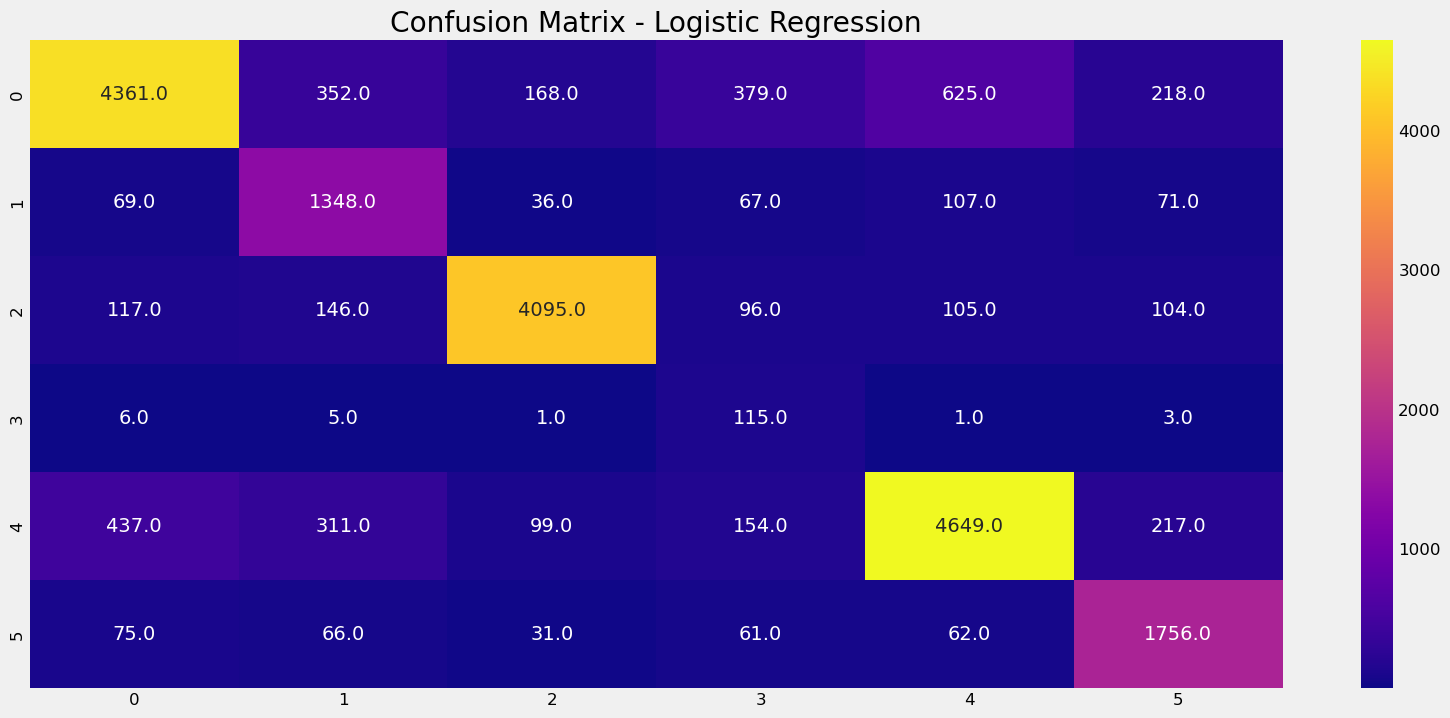

In [144]:
ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Logistic Regression'); 

In [81]:
# Avaliação modelo
from sklearn.metrics import classification_report

# Criando cristancia avaliador
class_report = classification_report(data2.category, model_logistic_pred)
print(class_report)

              precision    recall  f1-score   support

     colunas       0.86      0.71      0.78      6103
   cotidiano       0.61      0.79      0.69      1698
     esporte       0.92      0.88      0.90      4663
   ilustrada       0.13      0.88      0.23       131
     mercado       0.84      0.79      0.81      5867
       mundo       0.74      0.86      0.79      2051

    accuracy                           0.80     20513
   macro avg       0.68      0.82      0.70     20513
weighted avg       0.83      0.80      0.81     20513



# Modelo 02 - Decision Tree

In [96]:
%%time

# Importando biblioteca
from sklearn.tree import DecisionTreeClassifier 

# Criando modelo modelo Decision Tree
model_dtc = DecisionTreeClassifier(max_depth = 4, 
                                   random_state = 0)

# Criando treinamento modelo
model_dtc_fit = model_dtc.fit(matriz_vetores_treino, data1.category)

Wall time: 17.1 s


In [97]:
# Score modelo
model_dtc_score = model_dtc.score(matriz_vetores_treino, data1.category)
print("Modelo - Decision Tree Classifier: %.2f" % (model_dtc_score * 100))

Modelo - Decision Tree Classifier: 40.09


In [98]:
# Previsão modelo
modelo_arvore_cla_1_predict = model_dtc.predict(matriz_vetores_teste)
modelo_arvore_cla_1_predict

array(['colunas', 'ilustrada', 'mercado', ..., 'mercado', 'cotidiano',
       'mundo'], dtype=object)

In [99]:
# Probabilidade
modelo_arvore_cla_1_prob = model_dtc.predict_proba(matriz_vetores_teste)
modelo_arvore_cla_1_prob

array([[0.34984156, 0.09317183, 0.11857303, 0.18976796, 0.11617091,
        0.1324747 ],
       [0.20015471, 0.15296848, 0.08953781, 0.22858248, 0.21920325,
        0.10955328],
       [0.1300631 , 0.12283737, 0.05688988, 0.07022186, 0.54213312,
        0.07785467],
       ...,
       [0.1300631 , 0.12283737, 0.05688988, 0.07022186, 0.54213312,
        0.07785467],
       [0.13255719, 0.29207516, 0.0941585 , 0.22446895, 0.1879085 ,
        0.0688317 ],
       [0.10603933, 0.13623596, 0.11551966, 0.12605337, 0.11797753,
        0.39817416]])

In [104]:
from sklearn.metrics import accuracy_score

acuracia_decision_tree = accuracy_score(data2.category, modelo_arvore_cla_1_predict)

print("Accuracy - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Accuracy - Decision Tree: 41.28


In [113]:
class_report = classification_report(data2.category, modelo_arvore_cla_1_predict)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

     colunas       0.56      0.45      0.50      6103
   cotidiano       0.21      0.43      0.28      1698
     esporte       0.58      0.45      0.51      4663
   ilustrada       0.02      0.34      0.03       131
     mercado       0.67      0.35      0.46      5867
       mundo       0.30      0.39      0.34      2051

    accuracy                           0.41     20513
   macro avg       0.39      0.40      0.35     20513
weighted avg       0.54      0.41      0.45     20513



In [105]:
from sklearn.metrics import confusion_matrix

matrix_confusion_1 = confusion_matrix(data2.category, modelo_arvore_cla_1_predict)

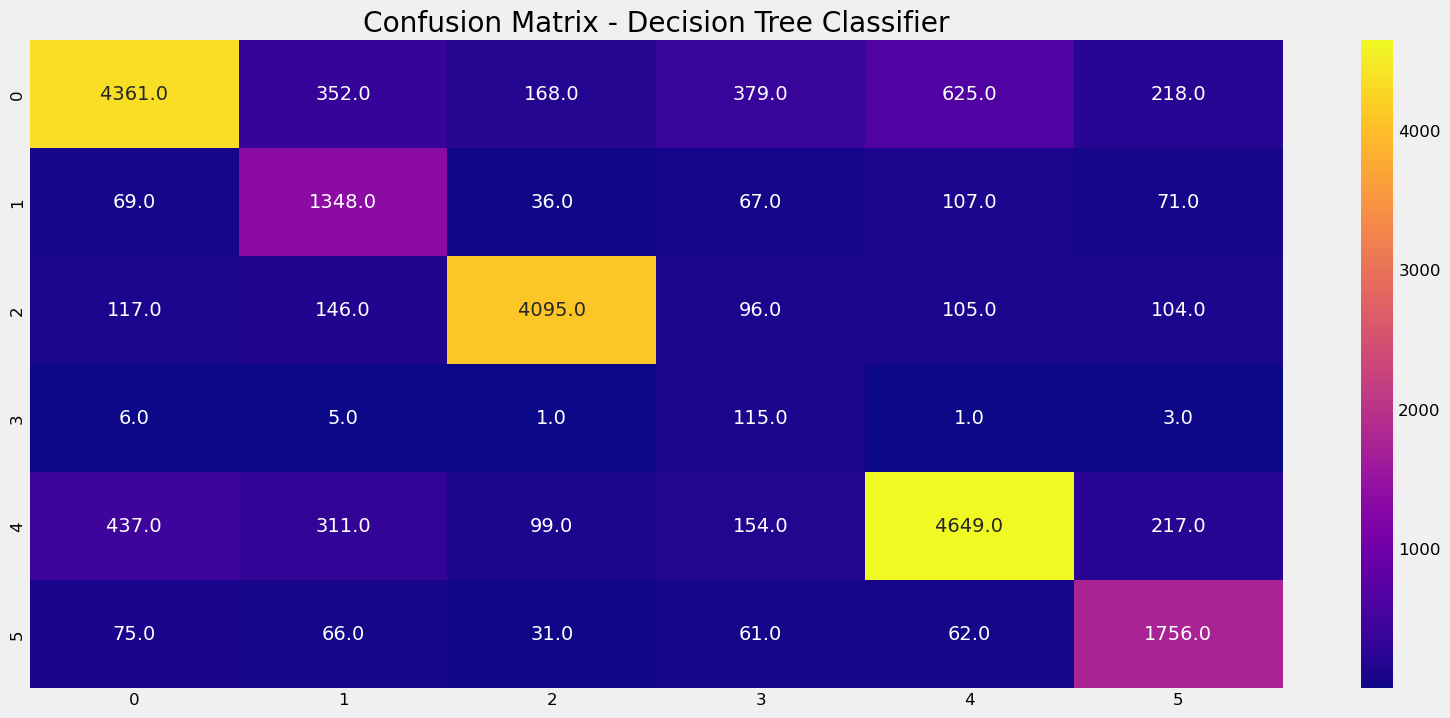

In [145]:
ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Decision Tree Classifier'); 
#ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

# Modelo 03 - KNN

In [111]:
%%time

# Importando biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Criando uma instância
model_knn = KNeighborsClassifier()

# Treinamento modelo
model_knn_fit = model_knn.fit(matriz_vetores_treino, data1.category)

Wall time: 132 ms


In [112]:
# Score modelo
model_knn_score = model_knn.score(matriz_vetores_treino, data1.category)
print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 63.41


In [114]:
# Previsão do modelo do k-nn

model_knn_pred = model_knn.predict(matriz_vetores_teste)
model_knn_pred

array(['colunas', 'cotidiano', 'mercado', ..., 'mercado', 'mercado',
       'mundo'], dtype=object)

In [115]:
accuracy_knn = accuracy_score(data2.category, model_knn_pred)
print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 63.45


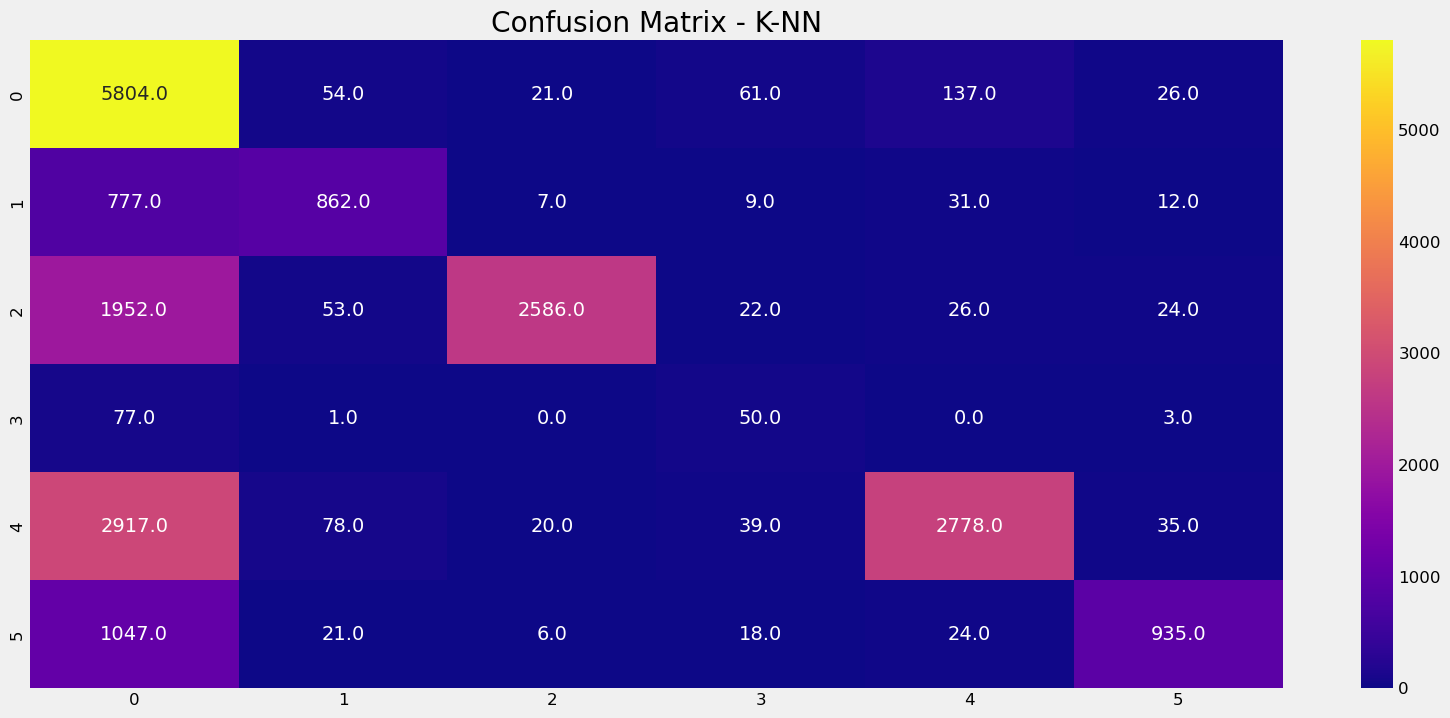

In [146]:
matrix_confusion_3 = confusion_matrix(data2.category, model_knn_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - K-NN'); 

In [117]:
classification = classification_report(data2.category, model_knn_pred)
print("Modelo 04 - K-NN")
print()
print(classification)

Modelo 04 - K-NN

              precision    recall  f1-score   support

     colunas       0.46      0.95      0.62      6103
   cotidiano       0.81      0.51      0.62      1698
     esporte       0.98      0.55      0.71      4663
   ilustrada       0.25      0.38      0.30       131
     mercado       0.93      0.47      0.63      5867
       mundo       0.90      0.46      0.61      2051

    accuracy                           0.63     20513
   macro avg       0.72      0.55      0.58     20513
weighted avg       0.78      0.63      0.64     20513



# Modelo 04 - Random forest

In [118]:
%%time
# Modelo 04 - Random forest

# Importando biblioteca
from sklearn.ensemble import RandomForestClassifier

# max_depth - determinando total de árvore, random_state 0
model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0) 

# Dados de treino, teste de x, y
model_random_forest_fit = model_random_forest.fit(matriz_vetores_treino, data1.category)

Wall time: 34.2 s


In [119]:
# Valor da Accuracy do algoritmo
model_random_forest_score = model_random_forest.score(matriz_vetores_treino, data1.category) 
print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 61.01


In [120]:
# Previsão do modelo
model_random_forest_regressor_pred = model_random_forest.predict(matriz_vetores_teste)
model_random_forest_regressor_pred

array(['colunas', 'cotidiano', 'mercado', ..., 'mercado', 'ilustrada',
       'mundo'], dtype=object)

In [121]:
# Accuracy model
accuracy_random_forest = accuracy_score(data2.category, model_random_forest_regressor_pred)
print("Accuracy - Random forest: %.2f" % (accuracy_random_forest * 100))

Accuracy - Random forest: 59.59


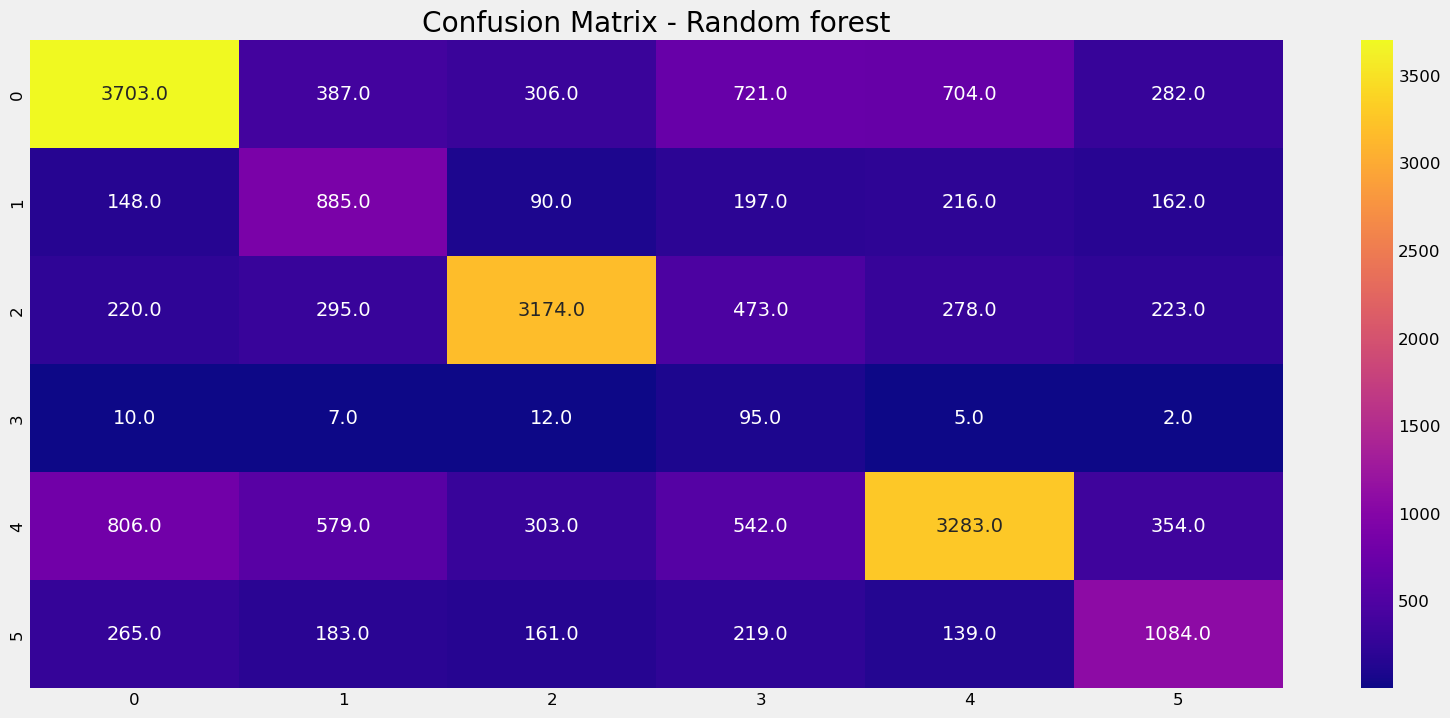

In [147]:
matrix_confusion_4 = confusion_matrix(data2.category, model_random_forest_regressor_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Random forest'); 

In [123]:
classification = classification_report(data2.category, model_random_forest_regressor_pred)
print("Modelo 04 - Random forest")
print()
print(classification)

Modelo 04 - Random forest

              precision    recall  f1-score   support

     colunas       0.72      0.61      0.66      6103
   cotidiano       0.38      0.52      0.44      1698
     esporte       0.78      0.68      0.73      4663
   ilustrada       0.04      0.73      0.08       131
     mercado       0.71      0.56      0.63      5867
       mundo       0.51      0.53      0.52      2051

    accuracy                           0.60     20513
   macro avg       0.52      0.60      0.51     20513
weighted avg       0.68      0.60      0.63     20513



# Resultado final

In [136]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica", 
                "K-NN", 
                "Random Forest", 
                "Decision Tree"],

    "Acurácia" :[acuracia_decision_tree,
                 acuracia_model_logistic, 
                 accuracy_knn,
                 accuracy_random_forest]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
1,K-NN,0.795788
2,Random Forest,0.634476
3,Decision Tree,0.595915
0,Regressão logistica,0.412811


In [143]:
## Salvando modelo M.L word2vec

import pickle
 
with open('modelo_arvore_cla_1_predict.pkl', 'wb') as file:
    pickle.dump(modelo_arvore_cla_1_predict, file)

with open('model_knn_pred.pkl', 'wb') as file:
    pickle.dump(model_knn_pred, file)

with open('model_random_forest_regressor_pred.pkl', 'wb') as file:
    pickle.dump(model_random_forest_regressor_pred, file)